In [1]:
%matplotlib inline

import csv

import colour
import numpy as np
from colour.plotting import *

import matplotlib.colors as mc 
from matplotlib import pyplot as plt

In [2]:
def ingest(filename, color):
    filepath = "data/" + filename
    points_list = []
    with open(filepath, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            points_list.append(np.array(row, dtype=float))

    RGB_list = []
    color_list = []
    for point in points_list:
    #     RGB_list.append(colour.models.eotf_inverse_sRGB(point / 255))
        RGB_list.append(point / 1.0)
        color_list.append(color)
        
    return RGB_list, color_list                                

In [3]:
points = ingest('Carpet_RGB.csv', 'w')[0] # very low saturation. Hue is erratic.
colors = ingest('Carpet_RGB.csv', 'w')[1]

points += ingest('Gray_track_RGB.csv', 'k')[0] # confuses with blue. Use saturation to tell then apart.
colors += ingest('Gray_track_RGB.csv', 'k')[1]

# "Final" tile set
points += ingest('Final_red.csv', 'r')[0]  
colors += ingest('Final_red.csv', 'r')[1]
points += ingest('Final_red_2.csv', 'r')[0]  
colors += ingest('Final_red_2.csv', 'r')[1]

points += ingest('Final_green.csv', 'g')[0]  # maybe usable?
colors += ingest('Final_green.csv', 'g')[1]
points += ingest('Final_green_2.csv', 'g')[0] 
colors += ingest('Final_green_2.csv', 'g')[1]

points += ingest('Final_blue.csv', 'b')[0] # separated from gray tracks by saturation
colors += ingest('Final_blue.csv', 'b')[1]
points += ingest('Final_blue_2.csv', 'b')[0] 
colors += ingest('Final_blue_2.csv', 'b')[1]

points += ingest('Final_yellow.csv', 'y')[0]  # overlaps with carpet
colors += ingest('Final_yellow.csv', 'y')[1]
points += ingest('Final_yellow_2.csv', 'y')[0] 
colors += ingest('Final_yellow_2.csv', 'y')[1]

points += ingest('Final_new_yellow.csv', 'y')[0] # like blue; slight overlap with gray tracks
colors += ingest('Final_new_yellow.csv', 'y')[1]
points += ingest('Final_new_yellow_2.csv', 'y')[0] 
colors += ingest('Final_new_yellow_2.csv', 'y')[1]

# points += ingest('Final_purple.csv', 'm')[0]  # overlaps with red
# colors += ingest('Final_purple.csv', 'm')[1]
# points += ingest('Final_purple_2.csv', 'm')[0] 
# colors += ingest('Final_purple_2.csv', 'm')[1]

# older tile set
# points += ingest('Azur_tile_RGB.csv', 'm')[0]  # same as final blue
# colors += ingest('Azur_tile_RGB.csv', 'm')[1] 
# points += ingest('Green_plate_RGB.csv', 'g')[0] # same as final green, but better V values (21-28)
# colors += ingest('Green_plate_RGB.csv', 'g')[1]

points += ingest('LightPink_brick_RGB.csv', 'm')[0] # good, but don't know where this came from
colors += ingest('LightPink_brick_RGB.csv', 'm')[1] 

points += ingest('Light_pink_brick.csv', 'm')[0] # confuses with track and carpet
colors += ingest('Light_pink_brick.csv', 'm')[1] 

# points += ingest('Dark_purple.csv', 'm')[0] # same hues as red, less saturated and less intensity
# colors += ingest('Dark_purple.csv', 'm')[1] 

# Data sets are not usable (need to be completed with plotting color)
# points += ingest('Blue_brick_RGB.csv')   # same as azur, but less conspicous visually
# points += ingest('Yellow_tile_RGB.csv')   # good 
# points += ingest('DarkGreen_brick_RGB.csv') # same as green plate, but less conspicous visually

# points += ingest('LightYellow_brick_RGB.csv')  # same as yellow, less saturation
# points += ingest('White_brick_RGB.csv')
# points += ingest('White_brick_RGB_2.csv')
# points += ingest('LightGreen_brick_RGB.csv') 
# points += ingest('Purple_brick_RGB.csv') # close to blue
# points += ingest('PurplePink_brick_RGB.csv') # similar to red
# points += ingest('PurpleBlue_brick_RGB.csv') # mixes with blue

points = [x/256. for x in points]

/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)


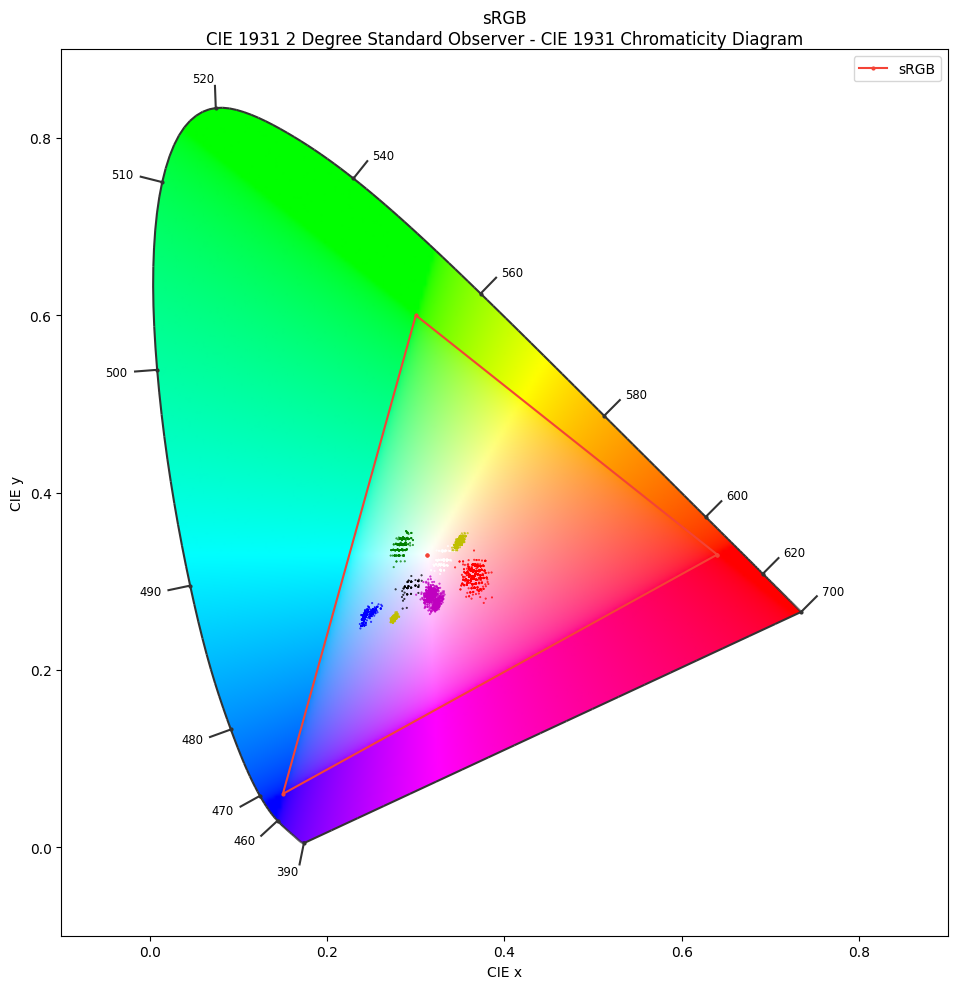

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 2.
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(points, scatter_kwargs={"c": colors, 'marker':'.', 's':1}, show_pointer_gamut=False)

### Conclusions:
 - yellows are tricky. Either confuse with the track or the carpet.
 - red, green, and blue are good - can be used to create a basic sector layout.
 - azure an blue tiles are essentially the same as far as hue/saturation goes.
 - discrimination between blue and the track needs to account for both hue and saturation.
 - purple needs some work to create isolation regions in the hue-saturation space. It could be used as auxiliary speed control, perhaps?
 - carpet can be discriminated solely on the basis of saturation.
 - the dark green tint causes data to show visible rounding/truncation effects 
